In [1]:
setwd('/import/a.jif/')

In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
daa = readRDS('./Tcell.after_ano.rds')

In [4]:
DefaultAssay(daa) = 'RNA'

In [5]:
library(Seurat)

In [6]:
Idents(daa) = 'celltype'

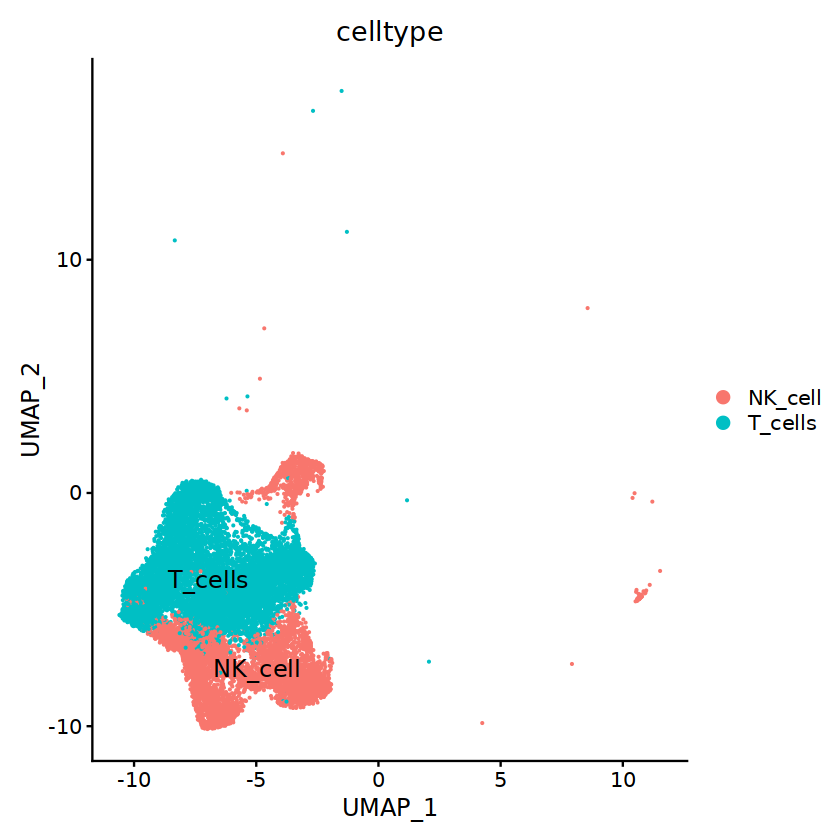

In [7]:
DimPlot(daa, group.by="celltype", label=T, label.size=5, reduction='umap')

In [8]:
immune.combined = daa

In [9]:
library(harmony)
DefaultAssay(immune.combined) = 'RNA'
sceList <- SplitObject(immune.combined, split.by = "orig.ident")
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])
DefaultAssay(single.ob) = 'RNA'
scRNA_harmony = single.ob
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster

Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.2.3"
Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
 12.519   6.858   9.465 

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
03:20:47 UMAP embedding parameters a = 0.9922 b = 1.112

03:20:47 Read 15336 rows and found 30 numeric columns

03:20:47 Using Annoy for neighbor search, n_neighbors = 30

03:20:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:20:48 Writing NN index file to temp file /tmp/RtmpR3r7pj/file12b397157b01f

03:20:48 Searching Annoy index using 1 thread, search_k = 3000

03:20:53 Annoy recall = 100%

03:20:53 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15336
Number of edges: 585529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9464
Number of communities: 7
Elapsed time: 5 seconds


In [10]:
options(repr.plot.width = 12,repr.plot.height = 8)

In [11]:
table(scRNA_harmony$group)


  Con Tumor 
 3562 11774 

In [12]:
options(repr.plot.width = 8,repr.plot.height = 6)

In [13]:
Idents(scRNA_harmony) = 'seurat_clusters'

In [25]:
scRNA_harmony = subset(scRNA_harmony,idents = c(0,1,2,3,4))

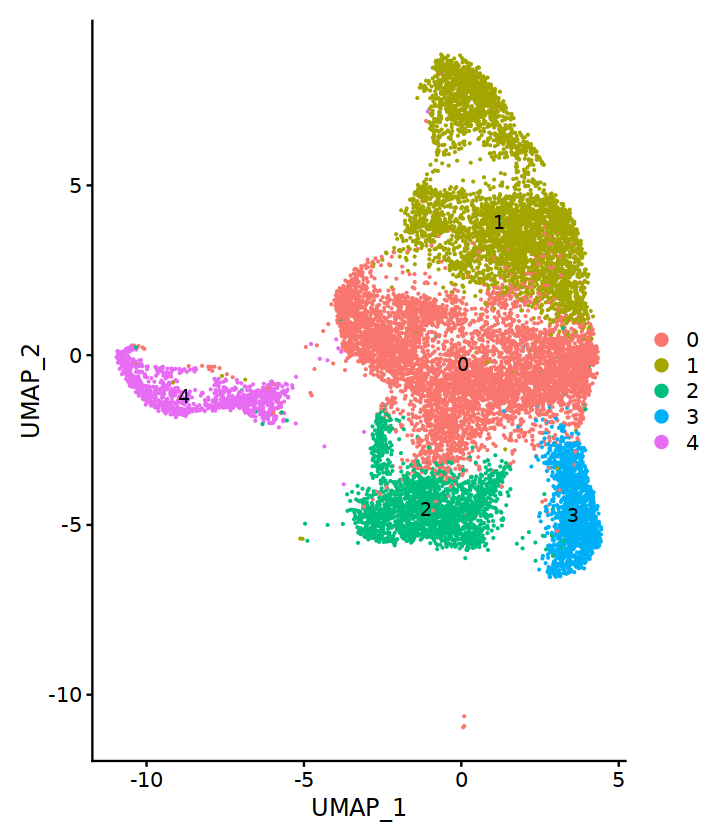

In [35]:
DimPlot(scRNA_harmony,label = T)

In [36]:
ggsave('sc.T.umap.pdf',width = 5,height =5 )

In [ ]:
# 3 TCL_GZMB
# 0 Tcell_GZMK
# 1 T_CD4_naive
# 2 NK
# 4 Prof_T

In [37]:
Idents(scRNA_harmony)  ='seurat_clusters'

celltype = data.frame(
    cluster = c(0,1,2,3,4),
    celltype = c('Tcell_GZMK','T_CD4_naive','NK','TCL_GZMB','Prof_T'
                )
)

for(i in 1:nrow(celltype)){
  scRNA_harmony@meta.data[which(scRNA_harmony@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [38]:
Idents(scRNA_harmony) = 'celltype'
DefaultAssay(scRNA_harmony) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster Tcell_GZMK

Calculating cluster TCL_GZMB

Calculating cluster NK

Calculating cluster T_CD4_naive

Calculating cluster Prof_T



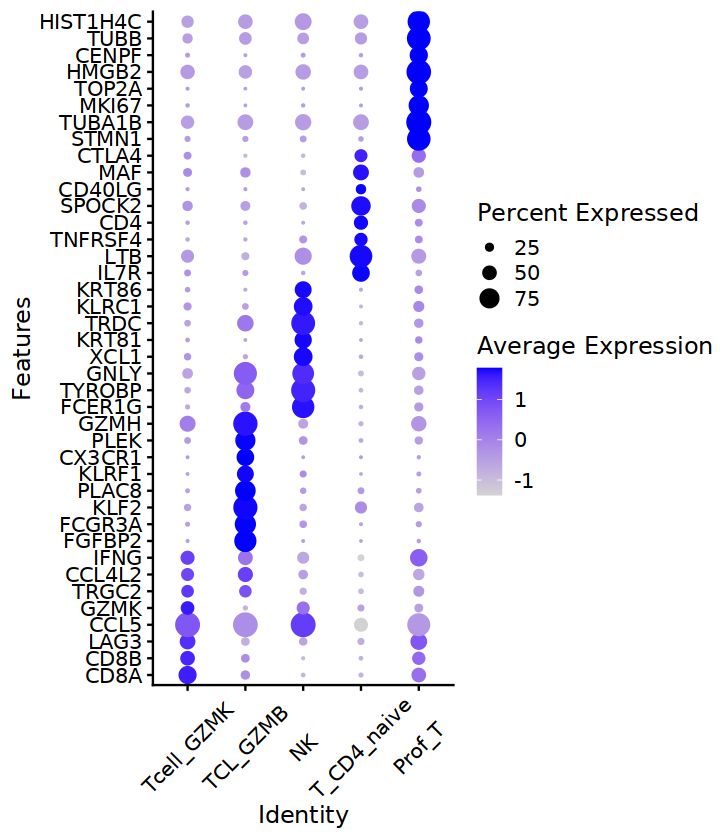

In [39]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)
library(ggplot2)
options(repr.plot.height = 7,repr.plot.width = 6)
 DotPlot(scRNA_harmony, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [40]:
ggsave('sc.T.marker.pdf',width = 6,height =7 )

In [41]:
options(repr.plot.width = 5,repr.plot.height = 5)

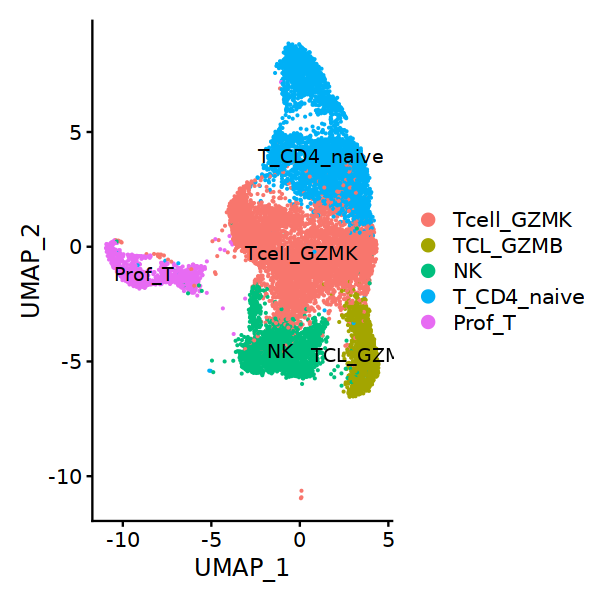

In [42]:
DimPlot(scRNA_harmony, reduction = "umap",ncol = 2,label = T)

In [43]:
ggsave('sc.T.umap2.pdf',width = 5,height = 6)

In [46]:
saveRDS(scRNA_harmony,file = 'final_Tcell.rds')

In [3]:
sce = readRDS('./final_Tcell.rds')

In [6]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [11]:
sce

An object of class Seurat 
27984 features across 15189 samples within 1 assay 
Active assay: RNA (27984 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [32]:
scRNA_harmony <- RunUMAP(sce, reduction = "harmony", dims = 1:30)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:30)

01:54:15 UMAP embedding parameters a = 0.9922 b = 1.112

01:54:15 Read 15189 rows and found 30 numeric columns

01:54:15 Using Annoy for neighbor search, n_neighbors = 30

01:54:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

01:54:16 Writing NN index file to temp file /tmp/RtmpCILhLK/filed95a7a66c241

01:54:16 Searching Annoy index using 1 thread, search_k = 3000

01:54:20 Annoy recall = 100%

01:54:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

01:54:22 Initializing from normalized Laplacian + noise (using irlba)

01:54:23 Commencing optimization for 200 epochs, with 671432 positive edges

01:54:39 Optimization finished



In [33]:
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15189
Number of edges: 579838

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9243
Number of communities: 7
Elapsed time: 4 seconds


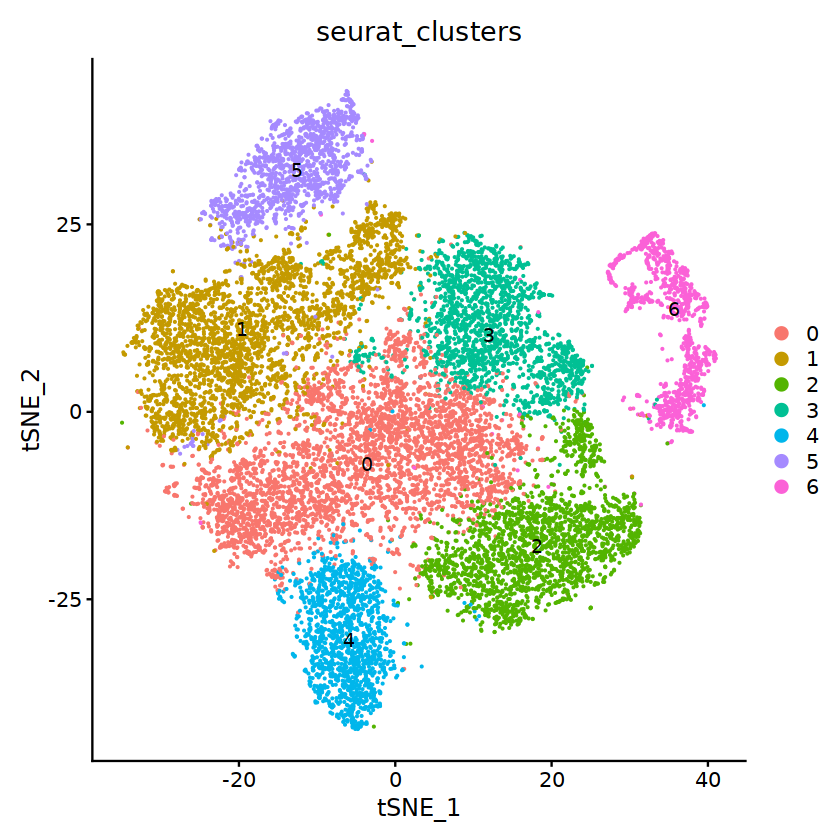

In [39]:
DimPlot(scRNA_harmony,group.by = 'seurat_clusters',reduction = 'tsne',label = T)

In [40]:
Idents(scRNA_harmony)  ='seurat_clusters'

celltype = data.frame(
    cluster = c(0,1,2,3,4,5,6),
    celltype = c('Tcell_GZMK','T_CD4_naive','NK', 'Tcell_GZMK' ,  'TCL_GZMB','Treg','Prof_T'
                )
)

for(i in 1:nrow(celltype)){
  scRNA_harmony@meta.data[which(scRNA_harmony@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [41]:
table(scRNA_harmony$celltype,scRNA_harmony$seurat_clusters)

             
                 0    1    2    3    4    5    6
  NK             0    0 2258    0    0    0    0
  Prof_T         0    0    0    0    0    0 1043
  TCL_GZMB       0    0    0    0 1485    0    0
  T_CD4_naive    0 3120    0    0    0    0    0
  Tcell_GZMK  3993    0    0 1919    0    0    0
  Treg           0    0    0    0    0 1371    0

In [42]:
Idents(scRNA_harmony) = 'celltype'
DefaultAssay(scRNA_harmony) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster Tcell_GZMK

Calculating cluster TCL_GZMB

Calculating cluster NK

Calculating cluster T_CD4_naive

Calculating cluster Prof_T

Calculating cluster Treg



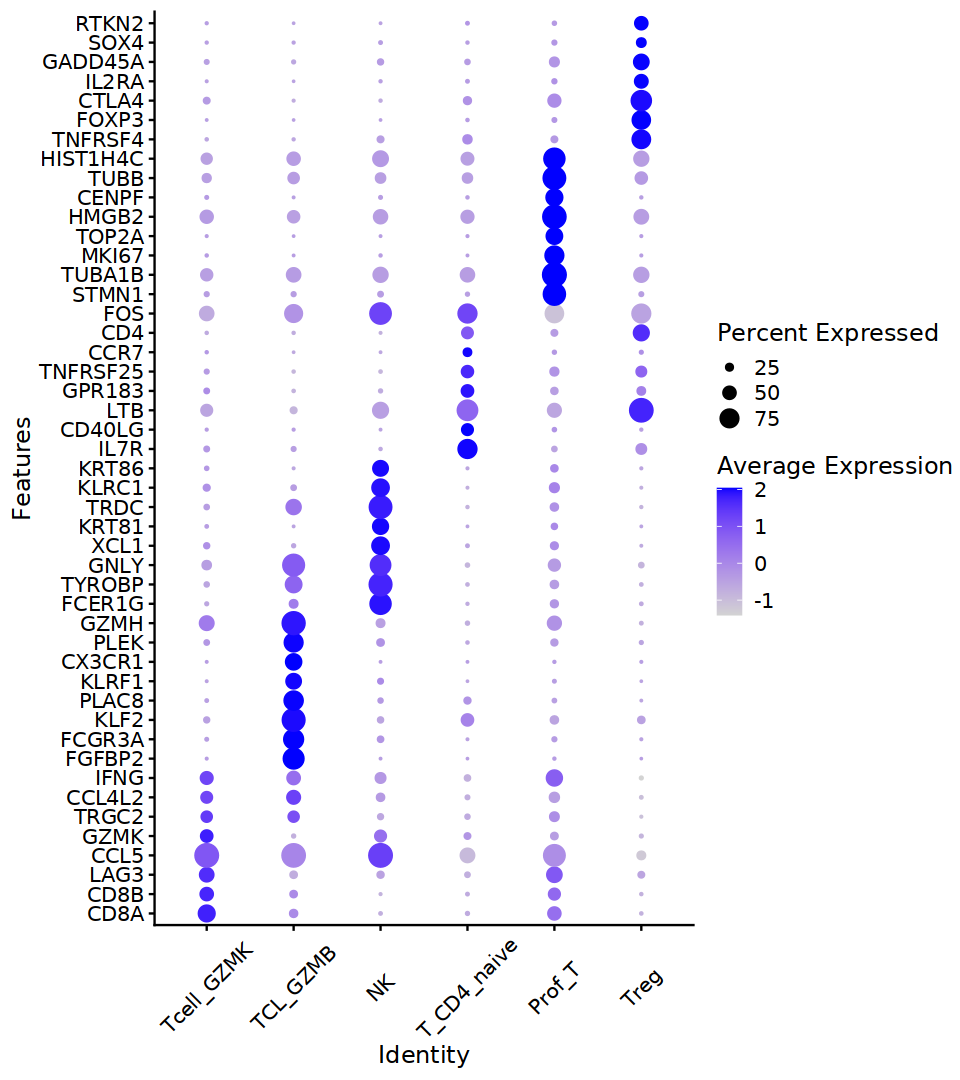

In [44]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)
library(ggplot2)
options(repr.plot.height = 9,repr.plot.width = 8)
 DotPlot(scRNA_harmony, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

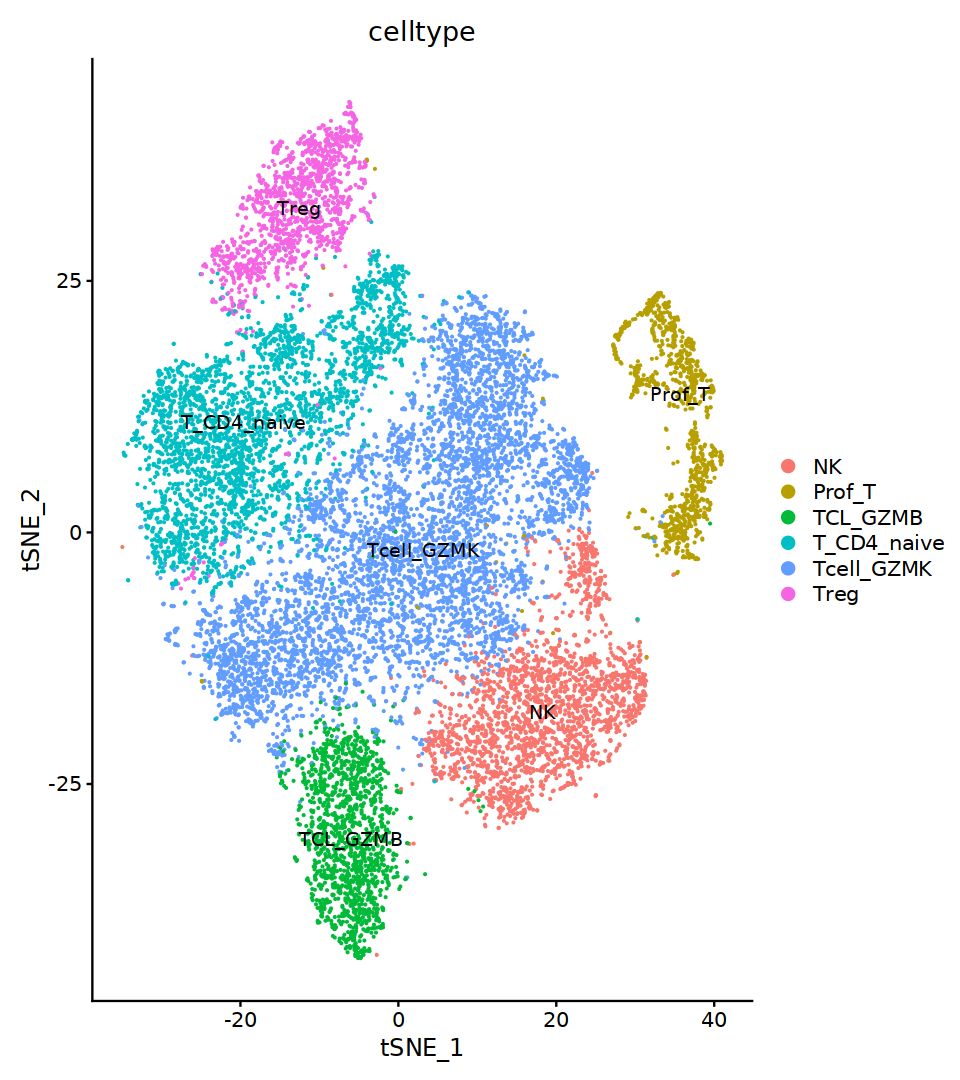

In [48]:
DimPlot(scRNA_harmony,group.by = 'celltype',reduction = 'tsne',label = T)

In [50]:
saveRDS(scRNA_harmony,file = 'scrna.anno2.rds')